# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [47]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [48]:
import matplotlib.pyplot as plt
import numpy as np

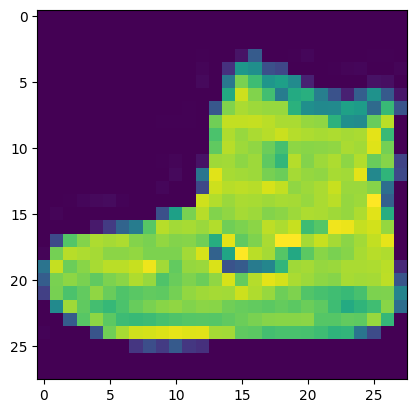

In [49]:
plt.imshow(x_train[0])

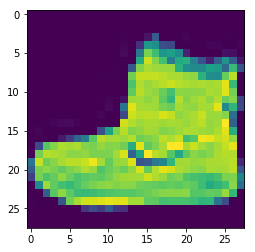

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [51]:


x_train = x_train /255.0
x_test = x_test / 255.0



In [50]:
print(np.max(x_train)) 

255


255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [52]:
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")
print(x_train.shape) 
print(x_test.shape) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [53]:
from keras.utils import to_categorical


num_classes = 10 

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape) 


(60000, 10)
(10000, 10)


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [54]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

cnn_model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax"),
    ])


In [75]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_21 (Dropout)        (None, 1600)             

In [59]:
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [60]:

history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)



Epoch 1/10
422/422 [==============================] - 32s 72ms/step - loss: 0.7100 - accuracy: 0.7413 - val_loss: 0.4559 - val_accuracy: 0.8392
Epoch 2/10
422/422 [==============================] - 29s 68ms/step - loss: 0.4683 - accuracy: 0.8321 - val_loss: 0.3865 - val_accuracy: 0.8628
Epoch 3/10
422/422 [==============================] - 27s 64ms/step - loss: 0.4134 - accuracy: 0.8526 - val_loss: 0.3653 - val_accuracy: 0.8723
Epoch 4/10
422/422 [==============================] - 27s 65ms/step - loss: 0.3815 - accuracy: 0.8640 - val_loss: 0.3534 - val_accuracy: 0.8725
Epoch 5/10
422/422 [==============================] - 27s 65ms/step - loss: 0.3591 - accuracy: 0.8727 - val_loss: 0.3235 - val_accuracy: 0.8858
Epoch 6/10
422/422 [==============================] - 27s 64ms/step - loss: 0.3407 - accuracy: 0.8769 - val_loss: 0.3073 - val_accuracy: 0.8888
Epoch 7/10
422/422 [==============================] - 28s 65ms/step - loss: 0.3264 - accuracy: 0.8822 - val_loss: 0.2970 - val_accuracy:

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [61]:
cnn_model.metrics_names


['loss', 'accuracy']

In [62]:
from keras.utils import to_categorical
import numpy as np

In [66]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


Test accuracy: 0.8935999870300293
Test loss: 0.29444000124931335


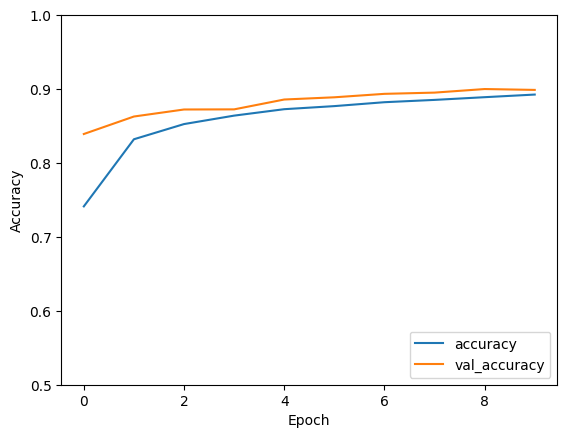

In [84]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")
plt.show()


In [77]:
# from sklearn.metrics import classification_report
# import numpy as np

# # predictions = cnn_model.predict_classes(x_test)
# predictions=cnn_model.predict(x_test) 
# classes_x=np.argmax(predictions,axis=1)
# print(classification_report(y_test, classes_x))


In [82]:
!pip install scikit-learn
from sklearn.metrics import classification_report

pred = cnn_model.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
y_train = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 8ms/step


In [83]:
print(classification_report(y_train, pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.80      0.84      1000
           3       0.90      0.89      0.90      1000
           4       0.80      0.86      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.67      0.69      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!